<a href="https://colab.research.google.com/github/bhagyashree57/ML_with_2_variable/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Using Supervised ML**

⭐

# **Linear Regression with Simple Statistics**

In this section we will see how simple Statistics can be use for machine learning by Some PYTHON LIBRARIES and can be used to implement
regression functions. We will start with simple linear regression involving two variables.

# **Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they
studied. This is a simple linear regression task as it involves just two variables.

This Method of Prediction is inspired from book - An Introduction to Statistical Learning with Applications in R By Gareth James, Daniela Witten,
Trevor Hastie, Robert Tibshirani.

### AUTHOR = BHAGYASHREE KANDE

In [ ]:

#importing essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Writing the Functions for β and 1 β0

In [ ]:
#calculating BETA 1
def calculate_BETA_one(x,y):
 x_mean= np.mean(x)
 y_mean = np.mean(y)
 numerator = np.sum(x * y - y_mean*x)
 denominator = np.sum( x**2 - x_mean * x )
 beta_one = numerator / denominator
 return beta_one

In [ ]:
#calculating BETA 0
def calculate_BETA_zero(x,y):
 x_mean= np.mean(x) # x bar
 y_mean = np.mean(y) # y bar
 beta_zero = (y_mean - (calculate_BETA_one(x,y) * x_mean))
 return beta_zero


Writing a Function for Formula

Y^i = β0 + β1xi

In [ ]:
#A function for Y to be Predicted
def predict_y(x,y,x_new):
 y_predicted = calculate_BETA_zero(x,y) + calculate_BETA_one(x,y) * x_new
 return y_predicted

In [ ]:
def plot_line(slope , intercept , x_min , x_max):
 x_values = np.arange(x_min , x_max)
 y_values = intercept + slope * x_values
 plt.plot(x_values , y_values , color = 'y')

# **Training dataset**

In [ ]:

 
df=pd.read_csv('http://bit.ly/w-data')
print("Data Imported Succesfully")
df.head(10)

Data Imported Succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Plotting Training DATA**

Text(0.5, 1.0, 'Hours v/s Scores Graph')

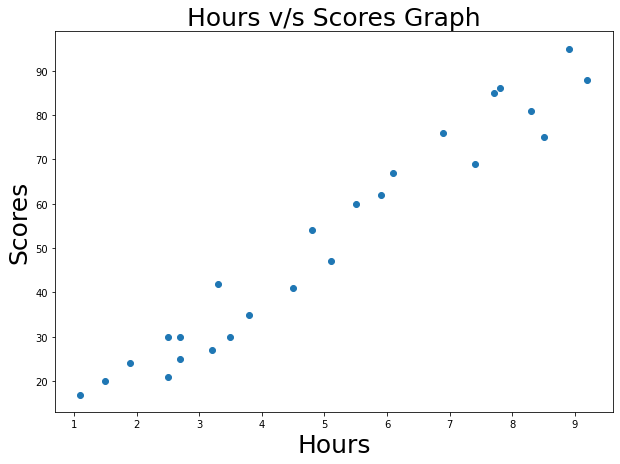

In [ ]:
fig , ax = plt.subplots(figsize = (10,7))
ax.scatter('Hours' , 'Scores' , data =df)
ax.set_xlabel('Hours', fontsize = 25)
ax.set_ylabel('Scores', fontsize = 25)
ax.set_title('Hours v/s Scores Graph' , fontsize = 25)

# **Implementing LINEAR REGRESSION On this Training Dataset**

Converting Values in x & y

In [ ]:

x = df['Hours'].values
y = df['Scores'].values
print(x)
print(y)


[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


calculating beta_one and beta_zero

In [ ]:
BETA_1 = float(calculate_BETA_one(x,y))
BETA_0 = float(calculate_BETA_zero(x,y))

In [ ]:

print(BETA_1)
print(BETA_0)

9.775803390787468
2.48367340537321


# **Training Completed**

Plotting Slope

Text(0.5, 0.98, 'hourse v/s scores using custom function')

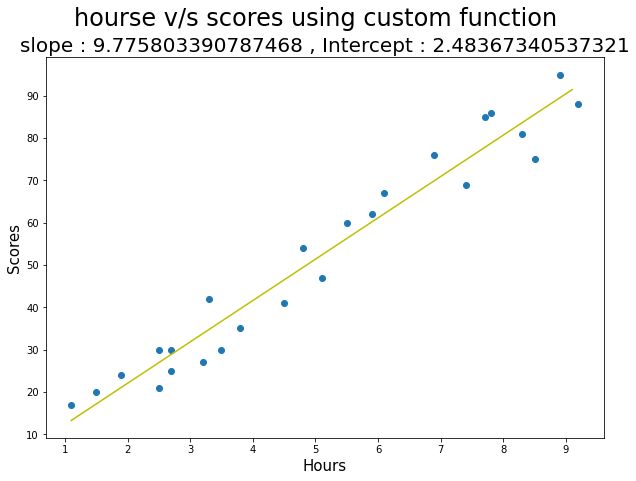

In [ ]:

fig , ax = plt.subplots(figsize = (10,7))
plot_line(BETA_1, BETA_0, np.min(x), np.max(x))
ax.scatter('Hours', 'Scores' , data=df)
ax.set_xlabel('Hours' , fontsize = 15)
ax.set_ylabel('Scores' , fontsize = 15)
ax.set_title(f'slope : {BETA_1} , Intercept : {BETA_0}', fontsize=20)
fig.suptitle('hourse v/s scores using custom function',fontsize = 24)

# **Making Predictions**

In [ ]:
x_new = 9.25
predict_y(x,y,x_new)

92.9098547701573

In [ ]:
print("No. Of Hours: " , x_new)
print("Score Predicted: " , predict_y(x,y,x_new))

No. Of Hours:  9.25
Score Predicted:  92.9098547701573


# **Calculating Error in predicted values**

In [ ]:
x_for_error = x
predict_y(x,y,x_for_error)

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [ ]:
error = np.mean( (y - predict_y(x,y,x_for_error))**2)
print(" The Error is : " , np.sqrt(error))

 The Error is :  5.374265578592619
